In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import matplotlib

from pmdarima import auto_arima
import pmdarima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
 
from itertools import product
#from tqdm import tqdm_notebook

import Model_Evaluation as me

In [2]:
#books = pd.read_csv('/Users/rahulnair/Desktop/Labelmaster_/Sales_Data/Books_ext_fs.csv')
#books = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LabelMaster/LabelMaster Data/Books_ext.csv')
#books = pd.read_csv('C:/Users/11602/OneDrive/Practicum/LabelMaster_Sales_Forecasting/data/Books_ext_fs.csv')
#packaging = pd.read_csv('C:/Users/11602/OneDrive/Practicum/LabelMaster_Sales_Forecasting/data/Packaging_ext_fs.csv')
packaging = pd.read_csv('Pack_ext_fs.csv')
packaging['Year_Month'] = pd.to_datetime(packaging['Year_Month'])
packaging.set_index('Year_Month', inplace = True)
packaging.index = pd.DatetimeIndex(packaging.index.values,
                               freq=packaging.index.inferred_freq)
packaging

,Sum of Sales,"Food & Kindred Products (000s, SA)_freight_m_trucking",Super Long-Haul (550+ mi)_freight_m_trucking,Change in Total Transp. Emp. (000's)_driver_indicators_m_trucking,"Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer",FTR Truck Loadings_M/M % Change_freight_m_trucking_trailer,FTR Rail Intermodal Loadings_M/M % Change_freight_m_trucking_trailer,"FTR Rail Carloadings (carload + intermodal) (000s, SA)_freight_m_trucking_trailer",FTR Rail Carloadings_M/M % Change_freight_m_trucking_trailer,FTR Cl. 8 Truck Tonnage_M/M % Change_freight_m_trucking_trailer,Change in Distillate Fuel Inventories_x
2008-01-01,381696.51,7126.929795,6351.102588,2.0,17.711599,-10.826287,-5.728404,-2.749882,-1.855190,3093.638815,1.794564,-3.537698,-2981.0
2008-02-01,430305.85,7090.093356,6306.556660,4.0,-21.096509,-16.623657,2.197078,0.590421,1.841867,3167.478461,2.386822,0.994483,-13327.0
2008-03-01,451627.81,7130.846968,6261.756219,0.0,12.451390,-6.406104,-6.795043,0.963854,0.682647,3164.474988,-0.094822,1.500016,-9852.0
2008-04-01,467417.48,7139.440571,6271.352278,5.0,-9.859063,-20.856725,-3.430210,-0.014003,-2.911224,2955.033944,-6.618508,-0.384513,-733.0
2008-05-01,462676.37,7179.943436,6275.163788,-12.0,3.365907,14.177437,5.186474,-0.794587,3.273510,3059.748460,3.543598,-0.798424,6890.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,456579.51,9375.896057,6240.013431,48.0,-25.612015,-33.586799,-12.877938,-11.868303,-12.597259,2202.067829,-14.351778,-8.401269,2134.0
2020-08-01,318564.72,9520.297567,6312.982923,85.0,-20.398412,13.435626,-7.676672,3.278161,4.534112,2185.585205,-0.748507,0.733856,1353.0
2020-09-01,980476.36,9472.590699,6258.050709,44.0,46.491376,17.536391,3.496257,5.879324,10.985691,2400.291965,9.823765,1.478794,-7196.0
2020-10-01,922901.36,9565.479621,6333.545023,62.0,6.538928,-11.888071,1.187032,2.427460,6.261749,2619.082565,9.115166,3.304924,-10130.4


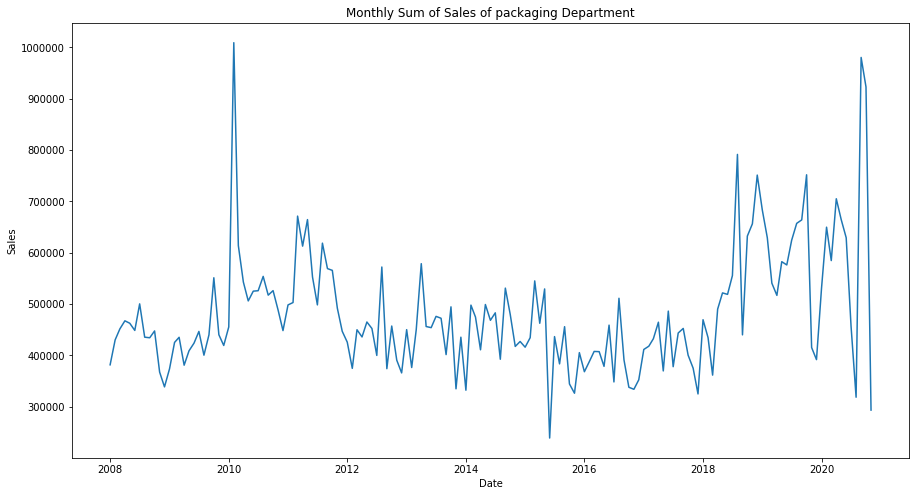

In [3]:
plt.figure(figsize=[15,8])
plt.plot(packaging['Sum of Sales'])
plt.title('Monthly Sum of Sales of packaging Department')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

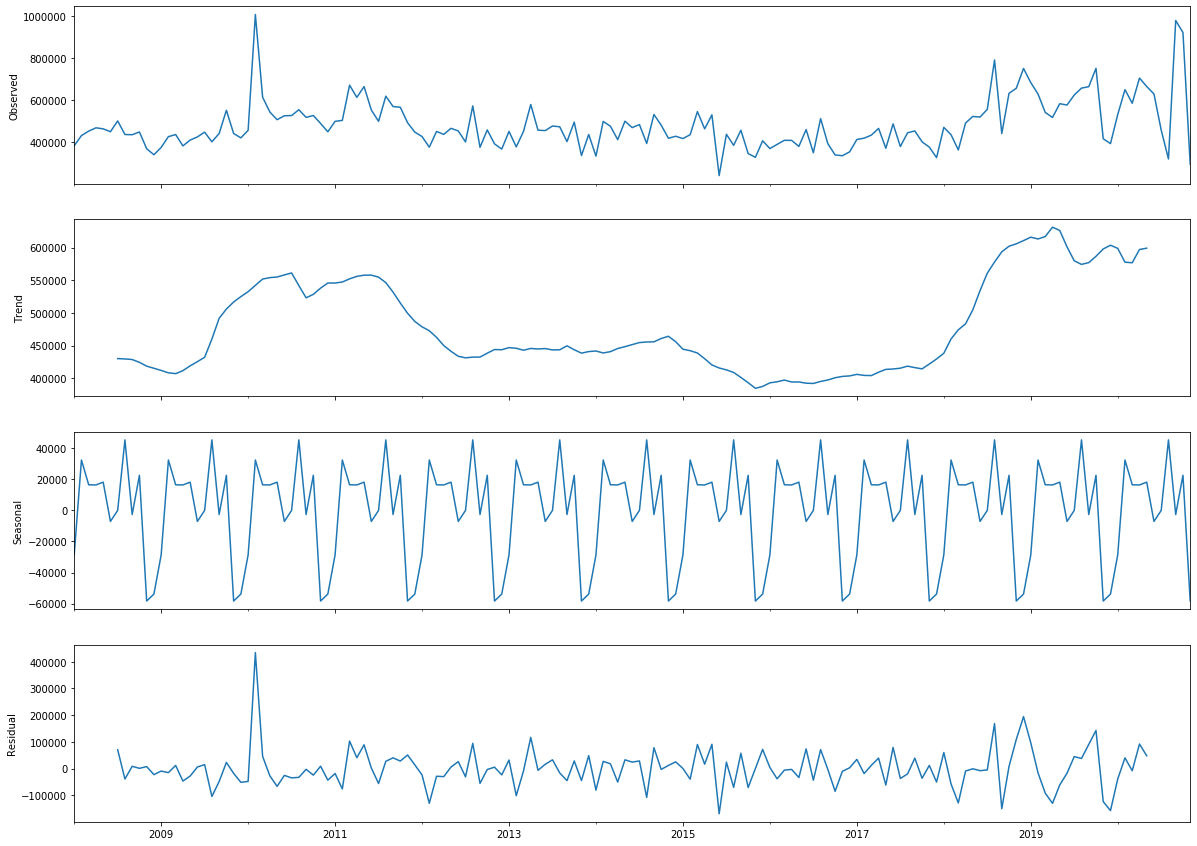

In [4]:
from pylab import rcParams

rcParams['figure.figsize'] = 20,15
decomposition = sm.tsa.seasonal_decompose(packaging['Sum of Sales'], model='additive')
fig, axes = plt.subplots(4, 1, sharex=True)
decomposition.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
decomposition.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')
plt.show()

In [5]:
packaging = packaging.dropna(axis = 1)
sales = packaging['Sum of Sales']
exog = packaging.iloc[:,2:]
exog

,Super Long-Haul (550+ mi)_freight_m_trucking,Change in Total Transp. Emp. (000's)_driver_indicators_m_trucking,"Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer",FTR Truck Loadings_M/M % Change_freight_m_trucking_trailer,FTR Rail Intermodal Loadings_M/M % Change_freight_m_trucking_trailer,"FTR Rail Carloadings (carload + intermodal) (000s, SA)_freight_m_trucking_trailer",FTR Rail Carloadings_M/M % Change_freight_m_trucking_trailer,FTR Cl. 8 Truck Tonnage_M/M % Change_freight_m_trucking_trailer,Change in Distillate Fuel Inventories_x
2008-01-01,6351.102588,2.0,17.711599,-10.826287,-5.728404,-2.749882,-1.855190,3093.638815,1.794564,-3.537698,-2981.0
2008-02-01,6306.556660,4.0,-21.096509,-16.623657,2.197078,0.590421,1.841867,3167.478461,2.386822,0.994483,-13327.0
2008-03-01,6261.756219,0.0,12.451390,-6.406104,-6.795043,0.963854,0.682647,3164.474988,-0.094822,1.500016,-9852.0
2008-04-01,6271.352278,5.0,-9.859063,-20.856725,-3.430210,-0.014003,-2.911224,2955.033944,-6.618508,-0.384513,-733.0
2008-05-01,6275.163788,-12.0,3.365907,14.177437,5.186474,-0.794587,3.273510,3059.748460,3.543598,-0.798424,6890.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,6240.013431,48.0,-25.612015,-33.586799,-12.877938,-11.868303,-12.597259,2202.067829,-14.351778,-8.401269,2134.0
2020-08-01,6312.982923,85.0,-20.398412,13.435626,-7.676672,3.278161,4.534112,2185.585205,-0.748507,0.733856,1353.0
2020-09-01,6258.050709,44.0,46.491376,17.536391,3.496257,5.879324,10.985691,2400.291965,9.823765,1.478794,-7196.0
2020-10-01,6333.545023,62.0,6.538928,-11.888071,1.187032,2.427460,6.261749,2619.082565,9.115166,3.304924,-10130.4


In [6]:
ytrain,ytest,Xtrain,Xtest = train_test_split(sales,exog, test_size=0.15, random_state=60616, shuffle=False)
Xtest.shape

(24, 11)

## ARIMA without exogenous dataset

In [11]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
df = pd.DataFrame()

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ytrain,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            combo = [(param,param_seasonal,results.aic)]
            df = df.append(combo)
        except:
            continue
            


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3766.4398959515784
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3347.9344895225813
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3101.03846072483
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2796.807541277009
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3127.379814757024
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3120.1467391297406
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2812.2185239559994
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2793.178431686606
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3658.539842095689
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3303.52219741725
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3071.0607613846673
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2733.5602541069056
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3340.273221698177
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3286.0311812282575
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2807.283692257114
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2735.559509918314
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3352.3295960002697
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3055.181678681127
ARIM

In [7]:
Xtest

,Super Long-Haul (550+ mi)_freight_m_trucking,Change in Total Transp. Emp. (000's)_driver_indicators_m_trucking,"Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer",FTR Truck Loadings_M/M % Change_freight_m_trucking_trailer,FTR Rail Intermodal Loadings_M/M % Change_freight_m_trucking_trailer,"FTR Rail Carloadings (carload + intermodal) (000s, SA)_freight_m_trucking_trailer",FTR Rail Carloadings_M/M % Change_freight_m_trucking_trailer,FTR Cl. 8 Truck Tonnage_M/M % Change_freight_m_trucking_trailer,Change in Distillate Fuel Inventories_x
2018-12-01,6488.690462,-7.0,-0.675027,-6.831999,0.715702,0.128196,-1.681639,2940.016032,-1.684915,0.408252,13650.0
2019-01-01,6538.281024,46.0,7.379170,12.000442,-0.642516,-0.519845,-0.250483,2899.300260,-1.384883,-0.822982,125.0
2019-02-01,6560.005591,2.0,-13.834094,-16.020936,5.994368,-0.585572,2.806222,2971.107360,2.476704,-1.028483,-3880.0
2019-03-01,6614.763691,6.0,16.953766,-9.301505,-4.297402,2.327927,6.109987,3135.580180,5.535741,3.936012,-3816.0
2019-04-01,6466.853570,7.0,-22.239934,15.540862,1.771471,0.126811,-4.808340,2967.013528,-5.375932,-0.208926,-4235.0
2019-05-01,6522.559913,3.0,0.225493,3.265382,13.629213,-1.285191,-1.256680,2906.251961,-2.047903,-1.384343,1792.0
2019-06-01,6544.793235,21.0,17.872045,8.113590,-3.200894,-0.187485,-1.351573,2823.138876,-2.859803,-0.526883,848.0
2019-07-01,6431.713255,-1.0,4.299844,-2.224605,0.948719,-0.358020,-1.656995,2885.340135,2.203266,0.354279,6957.0
2019-08-01,6394.933888,-4.0,2.408997,-0.274123,2.305962,0.175817,-1.223427,2851.564101,-1.170608,-0.164768,-2157.0
2019-09-01,6385.159848,11.0,-3.778673,0.164926,3.656693,0.923732,-0.497592,2826.740251,-0.870535,1.048257,-3909.0


In [12]:
df.columns=['param','param_seasonal','AIC']
df.sort_values('AIC').reset_index(drop=True)

,param,param_seasonal,AIC
0,"(0, 1, 1)","(0, 1, 1, 12)",2682.811668
1,"(1, 1, 1)","(0, 1, 1, 12)",2683.177582
2,"(0, 1, 1)","(1, 1, 1, 12)",2684.777846
3,"(1, 1, 1)","(1, 1, 1, 12)",2685.156219
4,"(1, 0, 1)","(0, 1, 1, 12)",2702.026665
...,...,...,...
59,"(0, 0, 0)","(0, 0, 1, 12)",3347.934490
60,"(0, 1, 0)","(0, 0, 0, 12)",3352.329596
61,"(1, 0, 0)","(0, 0, 0, 12)",3378.434695
62,"(0, 0, 1)","(0, 0, 0, 12)",3658.539842


In [8]:
mod = sm.tsa.statespace.SARIMAX(ytrain,
                                            order=(0,1,1),
                                            seasonal_order=(0,1,1,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()

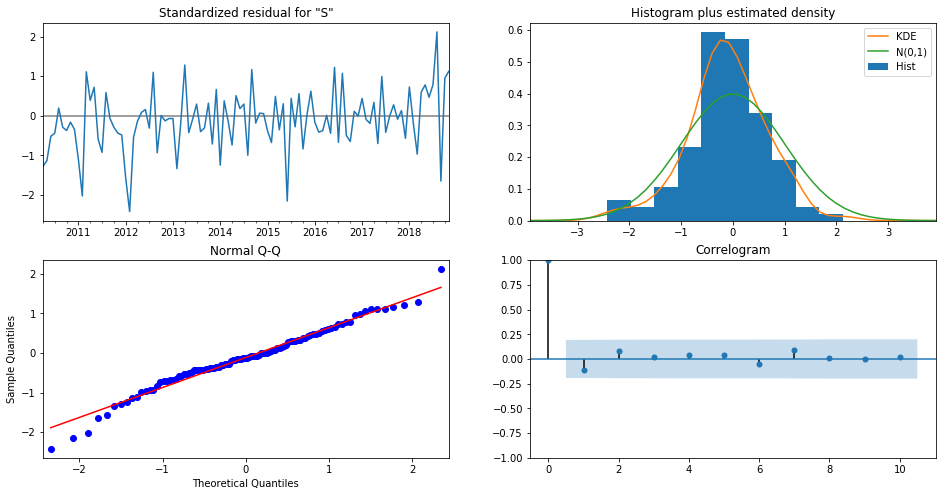

In [9]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

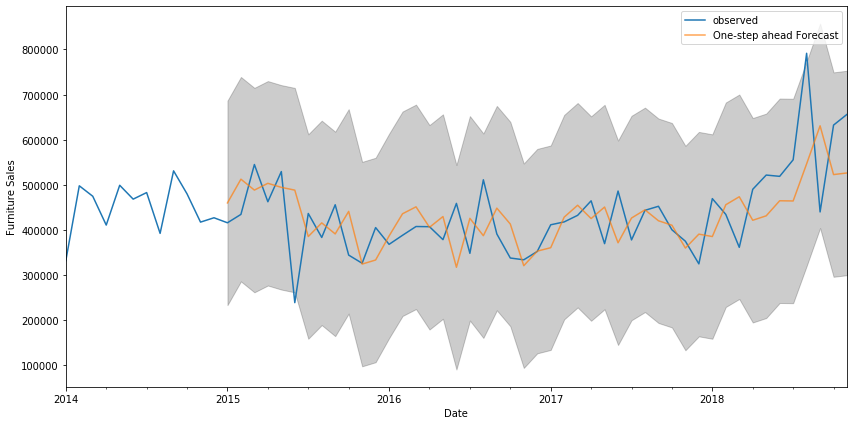

In [10]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ytrain['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

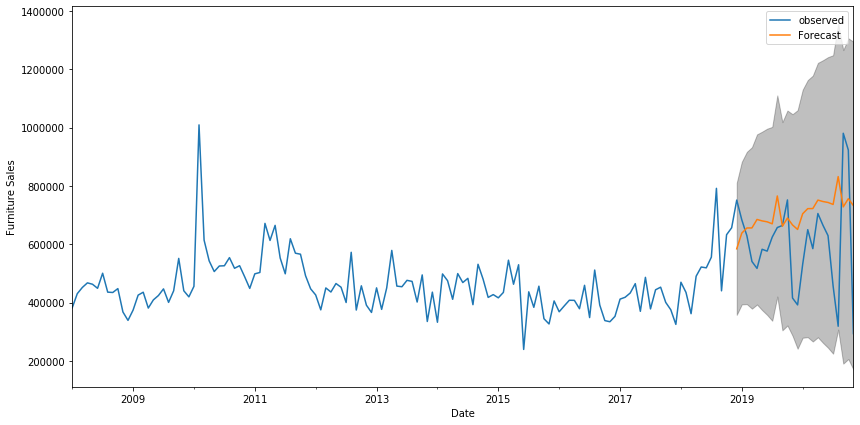

In [11]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = sales.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

## SARIMAX with exogenous dataset

In [12]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(ytrain)

(0.47944740472287606, True)

In [13]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(ytrain.diff()[1:,])

(0.01, False)

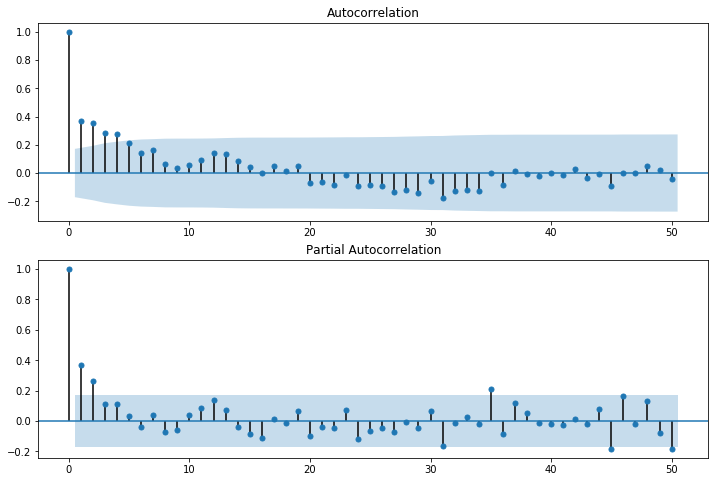

In [14]:
fig, ax = plt.subplots(2,1, figsize= (12,8))
fig = sm.graphics.tsa.plot_acf(ytrain, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(ytrain, lags=50, ax=ax[1])
plt.show()

In [138]:
p = q = [0,1]
d = [1,2]
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
df = pd.DataFrame()

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ytrain,
                                            exog= Xtrain,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            combo = [(param,param_seasonal,results.aic)]
            df = df.append(combo)
        except:
            continue

ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:3561.443611798602
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:2742.8924198449736
ARIMA(0, 1, 0)x(0, 2, 0, 12) - AIC:3295.0127114320503
ARIMA(0, 1, 0)x(0, 2, 1, 12) - AIC:2491.4951168509206
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:2821.824965583823
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:2743.2791161742343
ARIMA(0, 1, 0)x(1, 2, 0, 12) - AIC:2570.9947574134803
ARIMA(0, 1, 0)x(1, 2, 1, 12) - AIC:2492.067171984358
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:3045.52243393987
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:2678.4496552284877
ARIMA(0, 1, 1)x(0, 2, 0, 12) - AIC:2836.5751711435078
ARIMA(0, 1, 1)x(0, 2, 1, 12) - AIC:2446.654269483528
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:2772.227113062777
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:2680.3870463674884
ARIMA(0, 1, 1)x(1, 2, 0, 12) - AIC:2535.1876941461906
ARIMA(0, 1, 1)x(1, 2, 1, 12) - AIC:2454.669097603935
ARIMA(0, 2, 0)x(0, 1, 0, 12) - AIC:3653.6582471434076
ARIMA(0, 2, 0)x(0, 1, 1, 12) - AIC:2846.328663064574
ARIMA(0, 2, 0)x(0, 2, 0, 12) - AIC:33

In [139]:
df.columns=['param','param_seasonal','AIC']
df.sort_values('AIC').reset_index(drop=True)

,param,param_seasonal,AIC
0,"(0, 1, 1)","(0, 2, 1, 12)",2446.654269
1,"(1, 1, 1)","(1, 2, 1, 12)",2449.515476
2,"(0, 1, 1)","(1, 2, 1, 12)",2454.669098
3,"(1, 1, 1)","(0, 2, 1, 12)",2455.289641
4,"(1, 2, 1)","(0, 2, 1, 12)",2467.148039
...,...,...,...
59,"(1, 2, 0)","(0, 1, 0, 12)",3157.935659
60,"(0, 1, 0)","(0, 2, 0, 12)",3295.012711
61,"(0, 2, 0)","(0, 2, 0, 12)",3370.908915
62,"(0, 1, 0)","(0, 1, 0, 12)",3561.443612


In [15]:
mod = sm.tsa.statespace.SARIMAX(ytrain,
                                exog= Xtrain,
                                order=(0,1,1),
                                seasonal_order = (0,2,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Sum of Sales   No. Observations:                  131
Model:             SARIMAX(0, 1, 1)x(0, 2, 1, 12)   Log Likelihood               -1212.031
Date:                            Thu, 22 Apr 2021   AIC                           2452.062
Time:                                    10:10:18   BIC                           2487.367
Sample:                                01-01-2008   HQIC                          2466.311
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
====================================================================================================================================================================
                                                                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
Super Long-Haul (550+ mi)_freight_m_trucking                                                        61.1777    178.177      0.343      0.731    -288.043     410.398
Change in Total Transp. Emp. (000's)_driver_indicators_m_trucking                                 -946.2952   3376.999     -0.280      0.779   -7565.092    5672.502
Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer     1080.3279   5844.201      0.185      0.853   -1.04e+04    1.25e+04
Total Trailers, U.S._Production_M/M % Change_indicators_m_trucking_trailer                        -620.9969   5330.101     -0.117      0.907   -1.11e+04    9825.809
Total Classes 4-7, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer   348.4344   1.23e+04      0.028      0.977   -2.38e+04    2.45e+04
FTR Truck Loadings_M/M % Change_freight_m_trucking_trailer                                       -3.616e+04   1.08e+05     -0.334      0.739   -2.49e+05    1.76e+05
FTR Rail Intermodal Loadings_M/M % Change_freight_m_trucking_trailer                              -621.1751   1.49e+04     -0.042      0.967   -2.98e+04    2.86e+04
FTR Rail Carloadings (carload + intermodal) (000s, SA)_freight_m_trucking_trailer                   -2.9343    370.275     -0.008      0.994    -728.660     722.791
FTR Rail Carloadings_M/M % Change_freight_m_trucking_trailer                                     -2123.0754    1.9e+04     -0.112      0.911   -3.94e+04    3.52e+04
FTR Cl. 8 Truck Tonnage_M/M % Change_freight_m_trucking_trailer                                   3.845e+04   8.08e+04      0.476      0.634    -1.2e+05    1.97e+05
Change in Distillate Fuel Inventories_x                                                             -0.9172      9.581     -0.096      0.924     -19.696      17.862
ma.L1                                                                                               -0.7411      0.350     -2.117      0.034      -1.427      -0.055
ma.S.L12                                                                                            -1.1682      0.304     -3.837      0.000      -1.765      -0.571
sigma2                                                                                            3.549e+10      0.305   1.16e+11      0.000    3.55e+10    3.55e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                 5.27
Prob(Q):                              0.32   Prob(JB):                         0.07
Heteroskedasticity (H):               1.51   Skew:                          

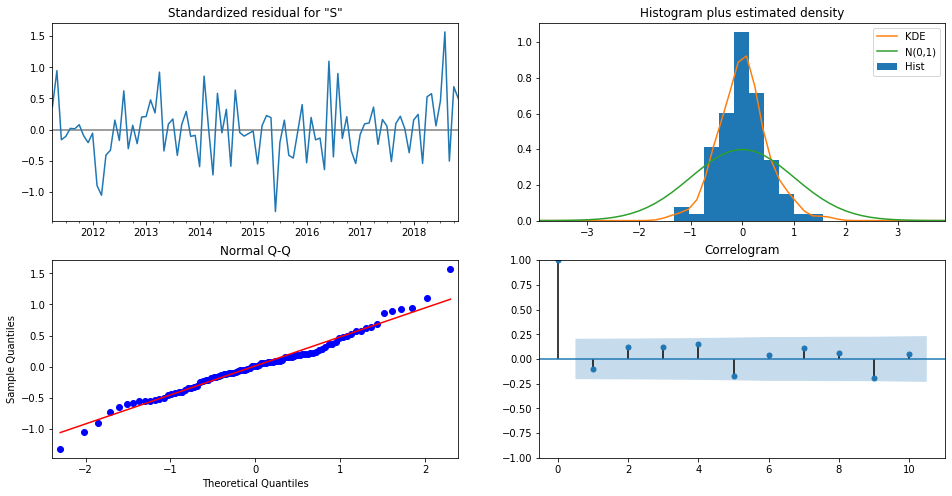

In [16]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

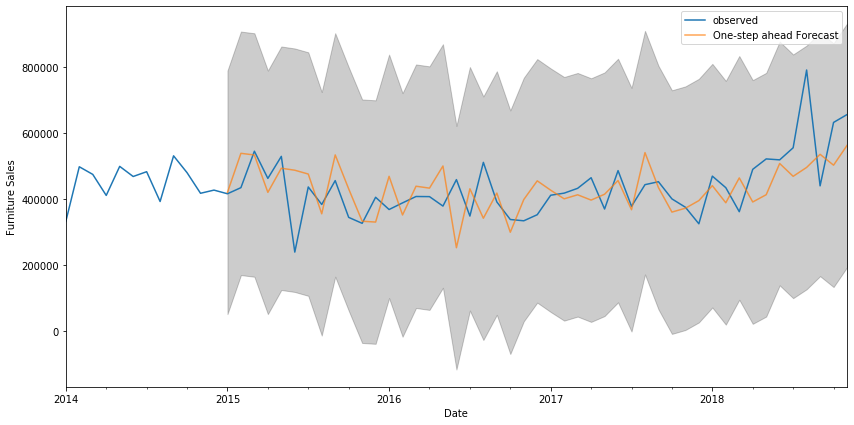

In [17]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ytrain['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

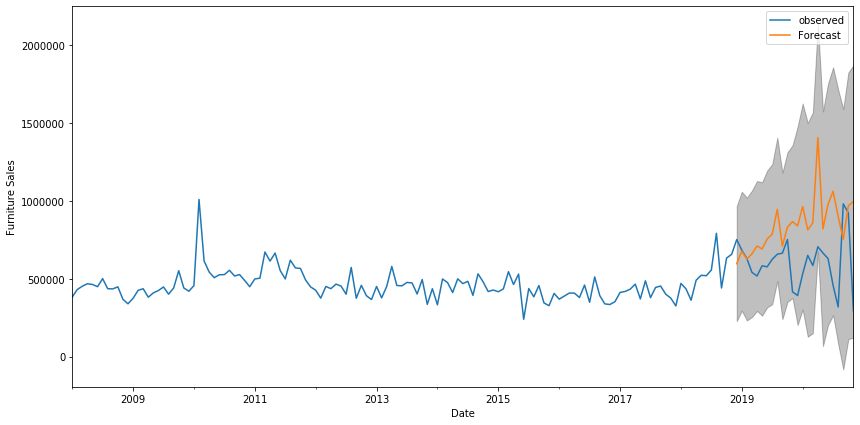

In [18]:
pred_uc = results.get_forecast(steps=24, exog= Xtest)
pred_ci = pred_uc.conf_int()
ax = sales.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [194]:
pred_uc.predicted_mean.astype('int64') 

2018-12-01     494321
2019-01-01     684745
2019-02-01     646915
2019-03-01     582518
2019-04-01     750682
2019-05-01     694763
2019-06-01     813390
2019-07-01     805124
2019-08-01    1124135
2019-09-01     734624
2019-10-01     893038
2019-11-01     944717
2019-12-01     756278
2020-01-01    1005006
2020-02-01     972389
2020-03-01     857483
2020-04-01    1018510
2020-05-01     962435
2020-06-01    1121518
2020-07-01    1072431
2020-08-01    1554044
2020-09-01    1099591
2020-10-01    1269593
2020-11-01    1348140
Freq: MS, Name: predicted_mean, dtype: int64

## AutoArima with exogneous dataset

In [19]:
model = auto_arima(ytrain,
                   X=Xtrain,
                   start_p=0,
                   start_q=0,
                   max_p = 4,
                   max_q = 4,
                   start_P = 0,
                   start_Q = 0,
                   max_P = 4,
                   max_Q =4,
                   d = 1,
                   D = 1,
                   m=12,
                   seasonal= True,
                  trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3590.596, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3096.445, Time=1.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3067.337, Time=1.57 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3099.063, Time=0.48 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3069.247, Time=1.94 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3069.227, Time=5.20 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3083.519, Time=1.27 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=3071.251, Time=5.95 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=1.50 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3068.475, Time=1.90 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=3072.188, Time=1.97 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=3079.719, Time=1.98 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=2.42 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=3083.214, Time=1.65 sec

Best model:  ARIMA(0,1,1)(0,

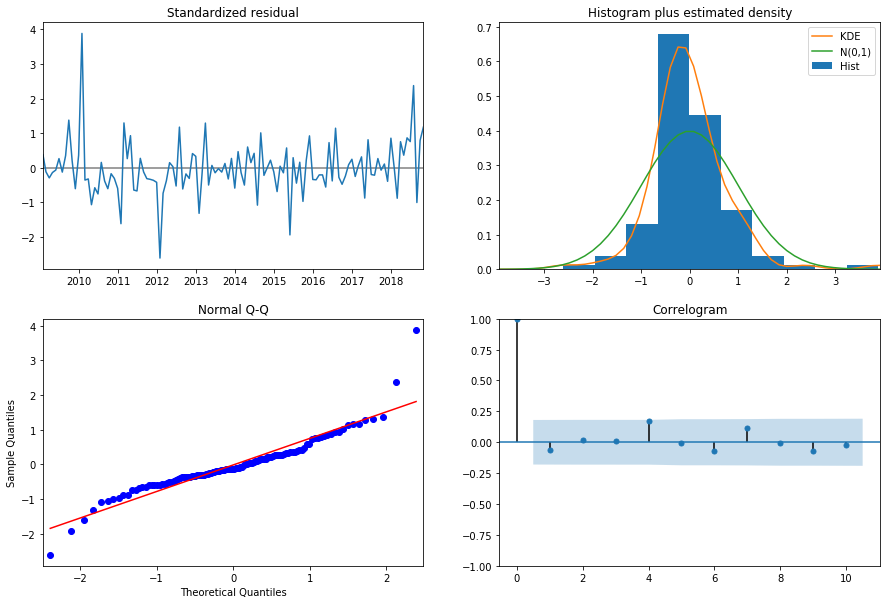

In [20]:
model.plot_diagnostics(figsize=(15,10))
plt.show()

In [21]:
results= pd.DataFrame(model.predict(24, Xtest), index=Xtest.index)
results

,0
2018-12-01,6.002154e+05
2019-01-01,5.608200e+05
2019-02-01,6.300762e+05
2019-03-01,6.812719e+05
2019-04-01,6.659089e+05
2019-05-01,6.595884e+05
2019-06-01,6.279601e+05
2019-07-01,6.585473e+05
2019-08-01,7.236690e+05
2019-09-01,6.312619e+05


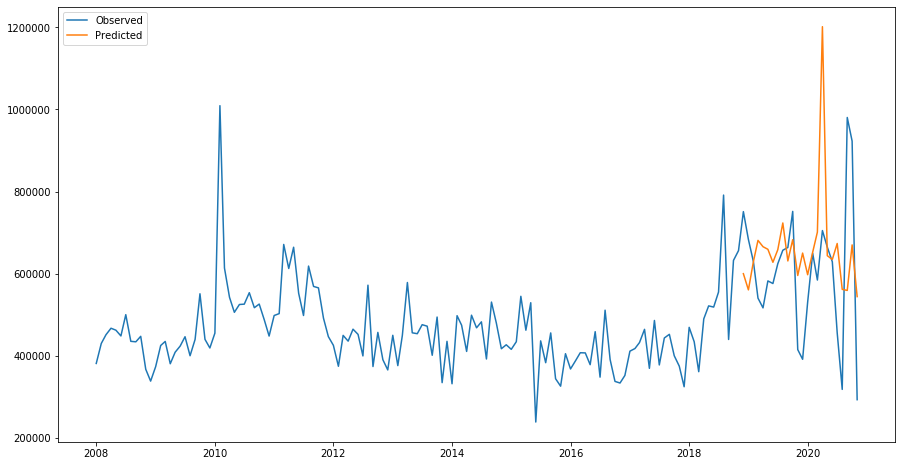

In [22]:
plt.figure(figsize=[15,8])
plt.plot(packaging['Sum of Sales'],label= 'Observed')
plt.plot(results, label='Predicted')
plt.legend()
plt.show()

# Model Evaluation
 - Mean Absolute Percentage Error
 - Mean Absolute Error
 - BIAS
 - Mean Squared Error
 - Root Mean Squared Error

In [46]:
predictions = pred.predicted_mean
actual = train['Sum of Sales'][start_point:]
me.evaluate_model(predictions,actual)

			Model Performance

Mean Absolute Percentage Error: 0.31201255790213267

Mean Absolute Error: 79766.50666560477

BIAS: 1078.5440954003998

Mean Squared Error: 108182935.0122452

Root Mean Squared Error: 10401.102586372523


In [47]:
test_prediction = results.forecast(steps=12)
test_actual = test['Sum of Sales']
me.evaluate_model(test_prediction,test_actual)

			Model Performance

Mean Absolute Percentage Error: 0.39041702782869514

Mean Absolute Error: 139126.0164250321

BIAS: 54700.91494719004

Mean Squared Error: 35906281152.71662

Root Mean Squared Error: 189489.52781807396
